In [1]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [2]:
df = pd.read_csv("./Chicago_Crimes_2012_to_2017.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df.shape

(1456714, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [6]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

In [7]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=100000)

In [8]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 612597 to 209248
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64


In [9]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
612597,034XX W 62ND PL,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,False,823,8.0,15.0,...,1862972.0,2013,41.779809,-87.708695,"(41.779809429, -87.708695406)",8,28,13,25,0
921473,072XX W BELMONT AVE,0554,ASSAULT,AGG PO HANDS NO/MIN INJURY,ALLEY,True,False,2511,25.0,36.0,...,1920434.0,2014,41.937994,-87.807269,"(41.937993931, -87.807268788)",10,6,1,43,0
455243,010XX W NORTH AVE,0890,THEFT,FROM BUILDING,MOVIE HOUSE/THEATER,False,False,1822,18.0,32.0,...,1910832.0,2013,41.910836,-87.653352,"(41.910835515, -87.653351515)",3,2,21,20,0
811241,019XX E 95TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,413,4.0,8.0,...,1842358.0,2014,41.722447,-87.577035,"(41.722447123, -87.577035442)",5,22,21,26,0
1199714,046XX W FIFTH AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,...,1895343.0,2016,41.868817,-87.741295,"(41.86881701, -87.741294925)",1,8,22,24,0


In [10]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [11]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


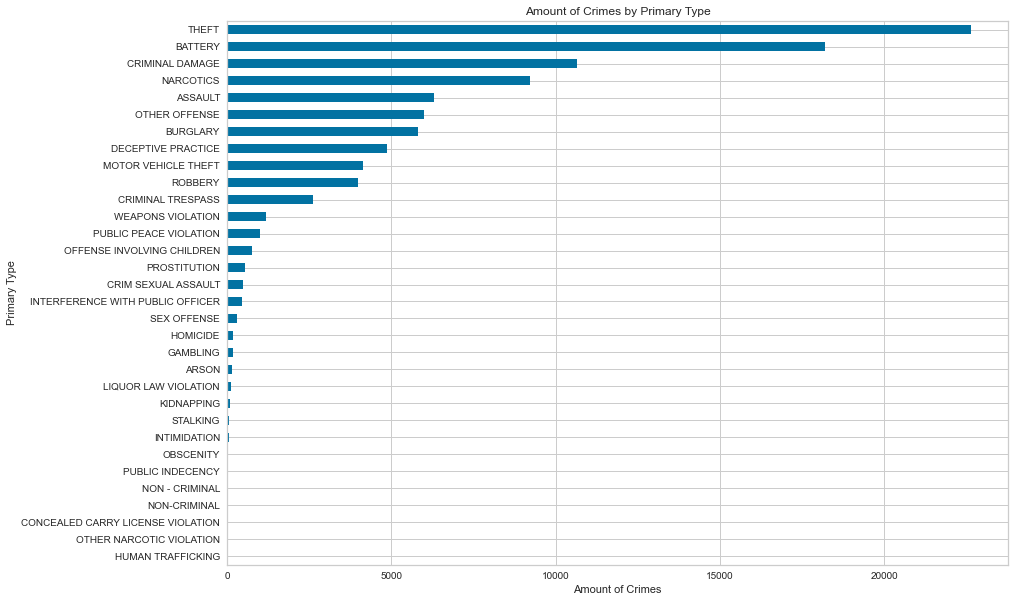

In [12]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [13]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
9,GAMBLING,174
0,ARSON,135
15,LIQUOR LAW VIOLATION,134
14,KIDNAPPING,75
29,STALKING,54
13,INTIMIDATION,50
20,OBSCENITY,14
25,PUBLIC INDECENCY,7
19,NON-CRIMINAL,3
18,NON - CRIMINAL,3


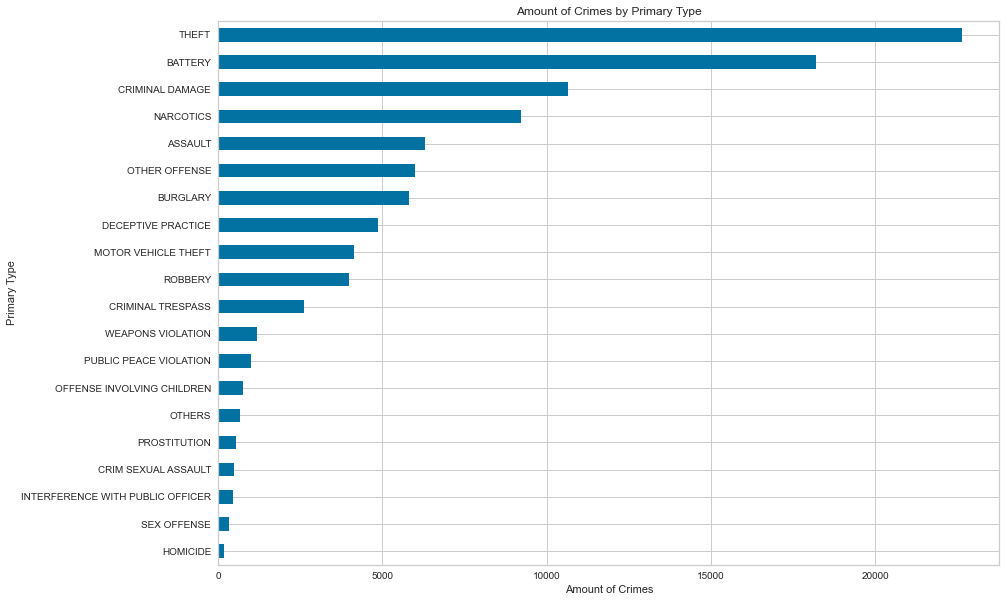

In [14]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [15]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['NARCOTICS', 'ASSAULT', 'THEFT', 'WEAPONS VIOLATION',
       'PROSTITUTION', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'BATTERY', 'OTHER OFFENSE',
       'CRIMINAL TRESPASS', 'BURGLARY', 'OTHERS',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'HOMICIDE',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE'], dtype=object)

In [16]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

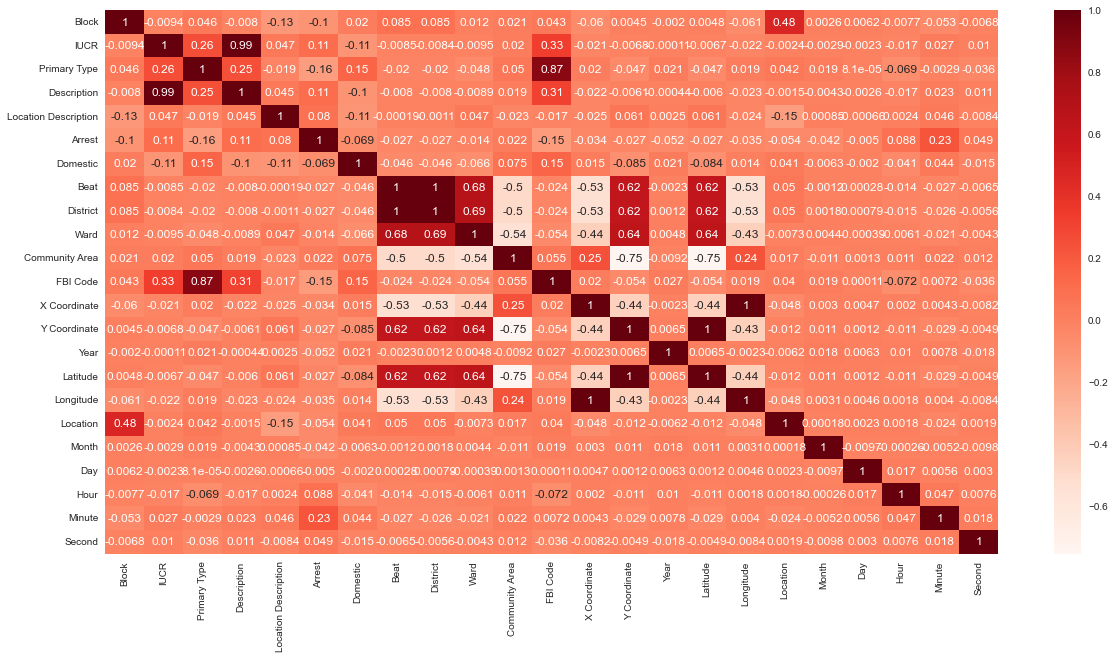

In [17]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.258438
Primary Type    1.000000
Description     0.251776
FBI Code        0.873580
Name: Primary Type, dtype: float64

In [19]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [20]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [21]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)
# Model Training
rf_model.fit(X=x1,
             y=x2)
# Prediction
result = rf_model.predict(y[Features])

In [22]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.99535
Recall      :  0.99535
Precision   :  0.9953187840443487
F1 Score    :  0.99535
Confusion Matrix: 
[[1837    0    0    0    0    0    0    0    0    0    0    0    8    0
     0    0    0    0    0    0]
 [   0 1288    0    0    0    0    0    7    0    0    0    0    0    0
     5    0    0    0    0    0]
 [   0    0 4528    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  210    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  108    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    1 2123    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0  849    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  970    0    0    0    0    0    0
     0    0    0    0    0 

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

                       NARCOTICS       1.00      1.00      1.00      1845
                         ASSAULT       1.00      0.99      0.99      1300
                           THEFT       1.00      1.00      1.00      4528
               WEAPONS VIOLATION       1.00      1.00      1.00       210
                    PROSTITUTION       0.99      1.00      1.00       108
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2124
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       849
              DECEPTIVE PRACTICE       0.99      1.00      1.00       970
                         BATTERY       1.00      1.00      1.00      3638
                   OTHER OFFENSE       0.99      0.99      0.99      1165
               CRIMINAL TRESPASS       0.99      1.00      1.00       517
                        BURGLARY       1.00      1.0

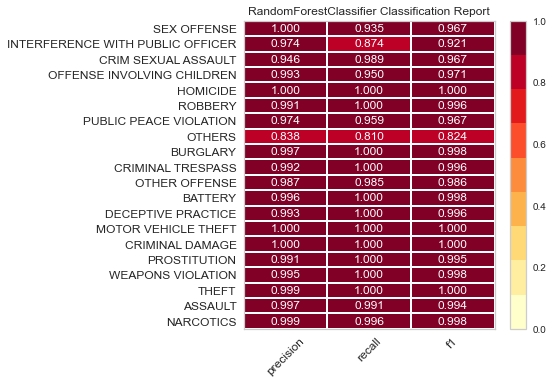

In [23]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()  

In [24]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )
# Model Training
nn_model.fit(X=x1,
             y=x2)
# Prediction
result = nn_model.predict(y[Features]) 

In [25]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.9805
Recall      :  0.9805
Precision   :  0.9815380906667347
F1 Score    :  0.9805
Confusion Matrix: 
[[1837    0    0    0    0    0    0    0    0    8    0    0    0    0
     0    0    0    0    0    0]
 [   0 1284    0    0    0    0    0    0    0    0    0    0    0    0
    16    0    0    0    0    0]
 [   0    0 4528    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  210    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  108    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2124    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0  849    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  965    0    0    0    0    0    0
     0    0    0    0    0   

================= Classification Report =================



C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


                                  precision    recall  f1-score   support

                       NARCOTICS       1.00      1.00      1.00      1845
                         ASSAULT       0.98      0.99      0.98      1300
                           THEFT       1.00      1.00      1.00      4528
               WEAPONS VIOLATION       1.00      1.00      1.00       210
                    PROSTITUTION       1.00      1.00      1.00       108
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2124
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       849
              DECEPTIVE PRACTICE       0.90      0.99      0.95       970
                         BATTERY       1.00      0.99      0.99      3638
                   OTHER OFFENSE       0.88      0.98      0.93      1165
               CRIMINAL TRESPASS       1.00      0.87      0.93       517
                        BURGLARY       1.00      1.00      1.00      1202
                          OTHERS     

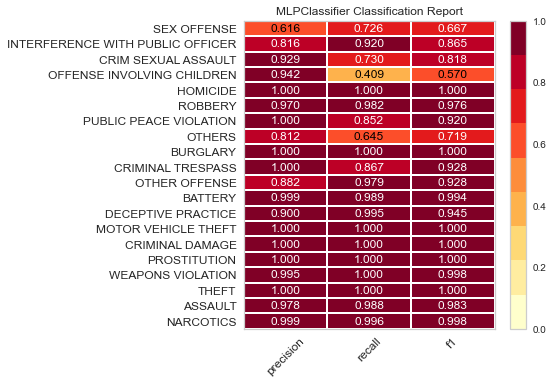

In [26]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof() 

In [27]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)
# Model Training
knn_model.fit(X=x1,
             y=x2)
# Prediction
result = knn_model.predict(y[Features]) 

In [28]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.9994
Recall      :  0.9994
Precision   :  0.9994008401571886
F1 Score    :  0.9994
Confusion Matrix: 
[[1842    0    0    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1300    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0 4528    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  210    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  108    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2124    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0  849    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  970    0    0    0    0    0    0
     0    0    0    0   

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

                       NARCOTICS       1.00      1.00      1.00      1845
                         ASSAULT       1.00      1.00      1.00      1300
                           THEFT       1.00      1.00      1.00      4528
               WEAPONS VIOLATION       0.99      1.00      0.99       210
                    PROSTITUTION       1.00      1.00      1.00       108
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2124
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       849
              DECEPTIVE PRACTICE       1.00      1.00      1.00       970
                         BATTERY       1.00      1.00      1.00      3638
                   OTHER OFFENSE       1.00      1.00      1.00      1165
               CRIMINAL TRESPASS       1.00      1.00      1.00       517
                        BURGLARY       1.00      1.0

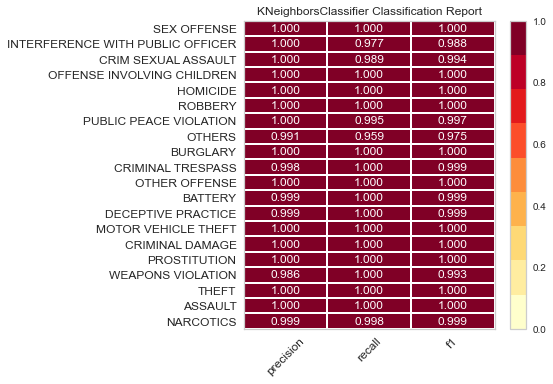

In [29]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()   

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,x2,train_size=0.5)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

LogisticRegression()

In [43]:
model.predict(X_test)


array([5, 2, 0, ..., 8, 2, 7], dtype=int64)

In [44]:
Y_predict=model.predict(X_test)
print('Accuracy of logistic regression classifier on test set is:',((model.score(X_test,Y_test)*100)))

Accuracy of logistic regression classifier on test set is: 56.832499999999996


In [ ]:
print("Accuracy  of Random Forest  : ", ac_sc)
